# Are posteriors too good?


This notebook explores how our Kalman filtered timeseries vary for different GW strains.

We should see a drop off in performance as the strain gets smaller

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from plotting import plot_custom_corner

In [9]:
import numpy as np 

def plot_all_corners(path,save_id,h):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(h*0.5,h*1.5)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,h]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_GW',title=r"$\bar{\theta}_{\rm GW}$ with $h = $"+str(h))





def parse_filename(f):

    return float(f.split('_')[3]) #this is the h value





from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict

import random
def single_run(h,measurement_model,seed,perturb_omega): 
    P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed) # define the system parameters as a dict. Todo: make this a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P) # generate some synthetic data

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
    if perturb_omega:
        print("Perturbing the omega value from its truth")
        true_parameters["omega_gw"] = true_parameters["omega_gw"]*random.uniform(0.1, 2.0)
        print("New omega = ", true_parameters["omega_gw"])
        
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
    print("Model likelihood is: ", model_likelihood)
    plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 1,savefig=None)





## Lets consider 3 different strain levels

In [19]:
large_h_earth = "../data/nested_sampling/BayesV7/V7Bayes_h_1e-12_model_earth_seed_1237_result.json" 
large_h_null = "../data/nested_sampling/BayesV7/V7Bayes_h_1e-12_model_null_seed_1237_result.json" 



small_h_earth = "../data/nested_sampling/BayesV7/V7Bayes_h_1.8620871366628655e-15_model_earth_seed_1237_result.json" 
small_h_null = "../data/nested_sampling/BayesV7/V7Bayes_h_1.8620871366628655e-15_model_null_seed_1237_result.json" 


mid_h_earth = "../data/nested_sampling/BayesV7/V7Bayes_h_1.3803842646028866e-14_model_earth_seed_1237_result.json"
mid_h_null = "../data/nested_sampling/BayesV7/V7Bayes_h_1.8197008586099826e-14_model_null_seed_1237_result.json" 


## 1. Large strain 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Model likelihood is:  -643200.4257978579
Mean residual: -5.482473050756915e-12


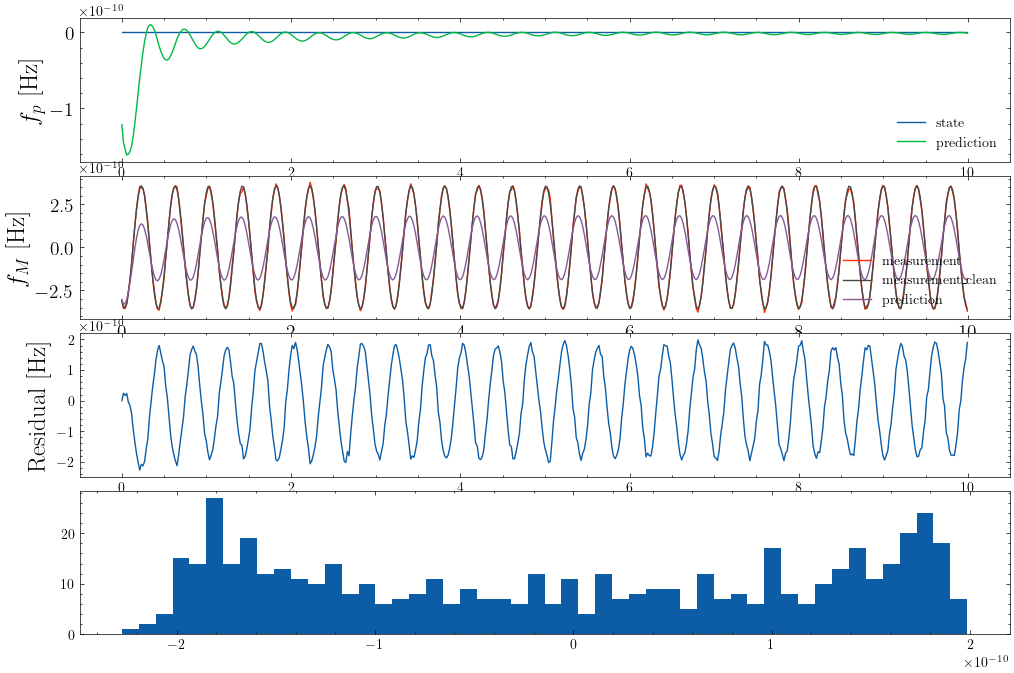

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


Model likelihood is:  -2410780.6364987902
Mean residual: -8.470905904106469e-12


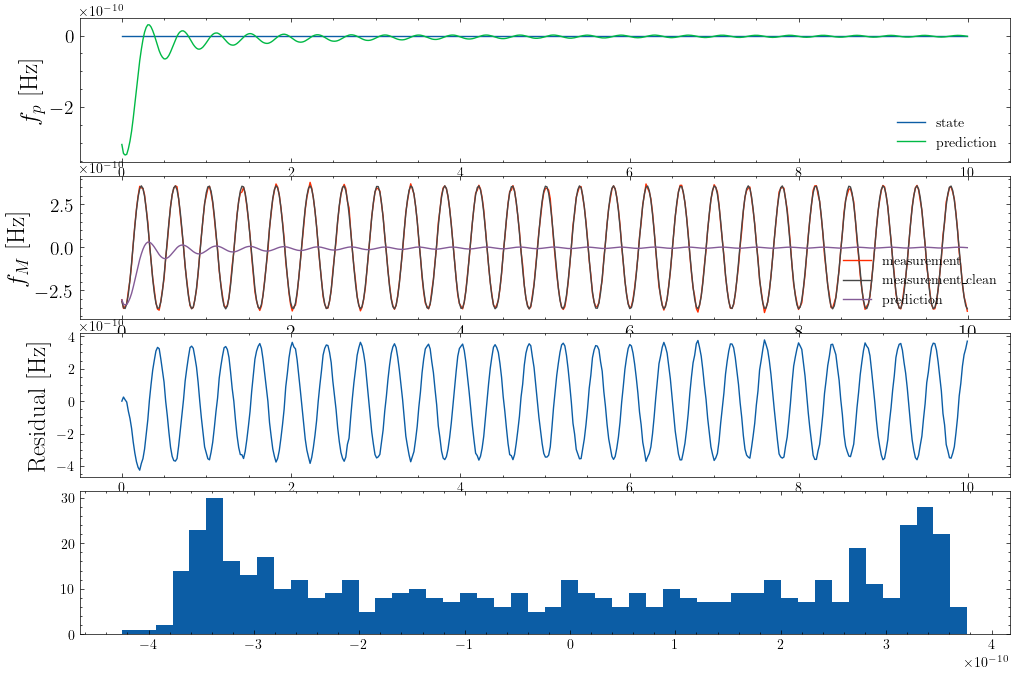

The evidence is: -538161.9365404743
Number of samples:
30400
Truths/Medians/Variances
$\omega$ 5e-07 4.999864341072743e-07 2.0783864465270865e-23
$\Phi_0$ 0.2 0.19094248954480586 6.001731929022922e-07
$\psi$ 2.5 2.594133097663107 5.089436747079936e-07
$\iota$ 1.0 0.9008475572524197 0.0065580657427061735
$\delta$ 1.0 0.9988005951449866 4.6255736693726764e-07
$\alpha$ 1.0 1.0377149921257018 2.480259395169232e-07
h 1e-12 1.173915456060169e-12 4.60315811149151e-27


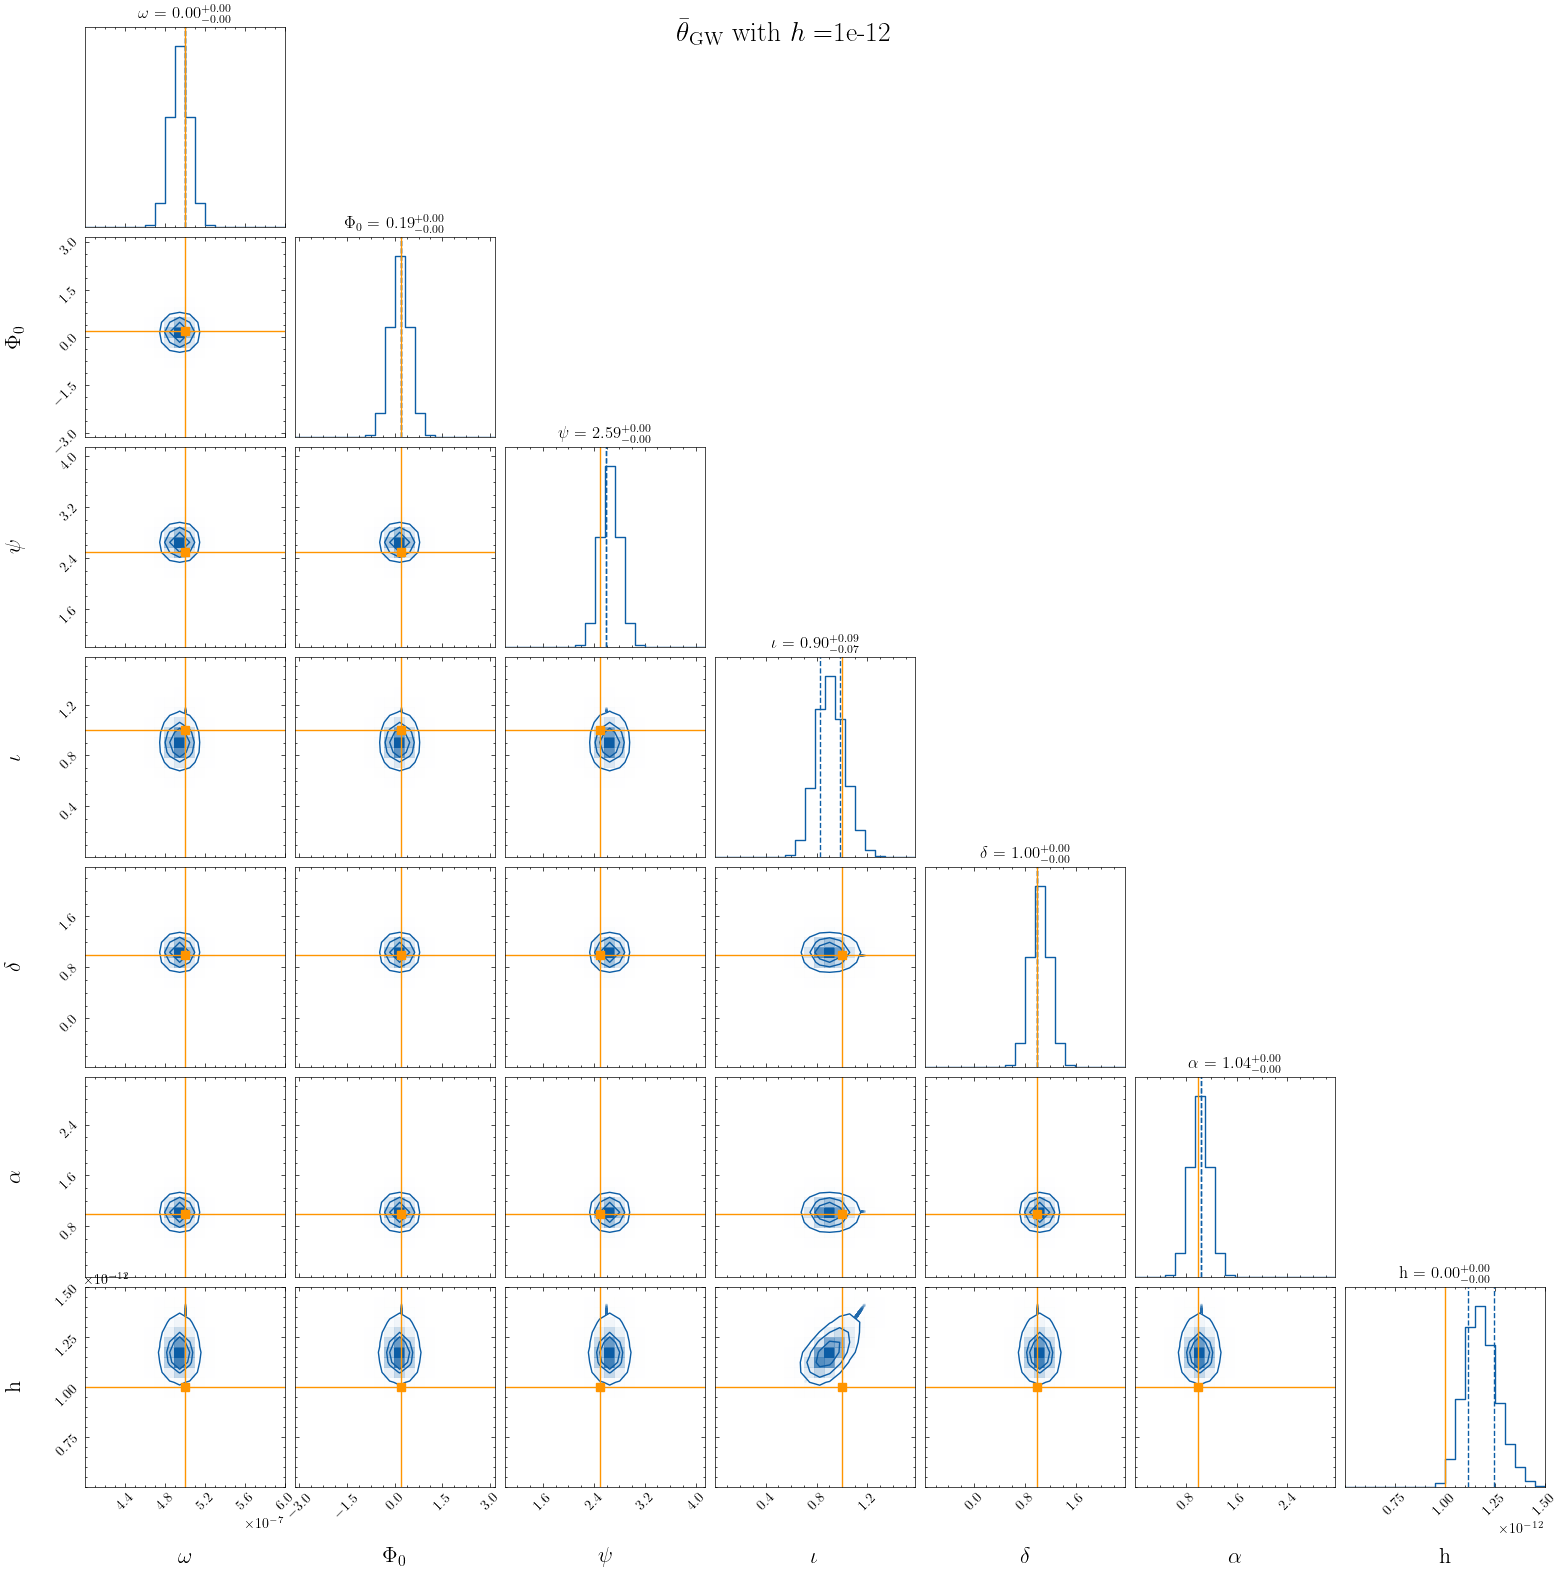

**********************************************************************


In [15]:
h = parse_filename(large_h_earth)
seed = 1237
single_run(h,"earth",seed,perturb_omega=False)
single_run(h,"null",seed,perturb_omega=False)
plot_all_corners(large_h_earth,save_id=None, h=h) #no point plotting a corner plot for the null model - we dont have those parameters!

## 2. Medium strain

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Model likelihood is:  585538.2448354368
Mean residual: 1.0149550949280387e-13


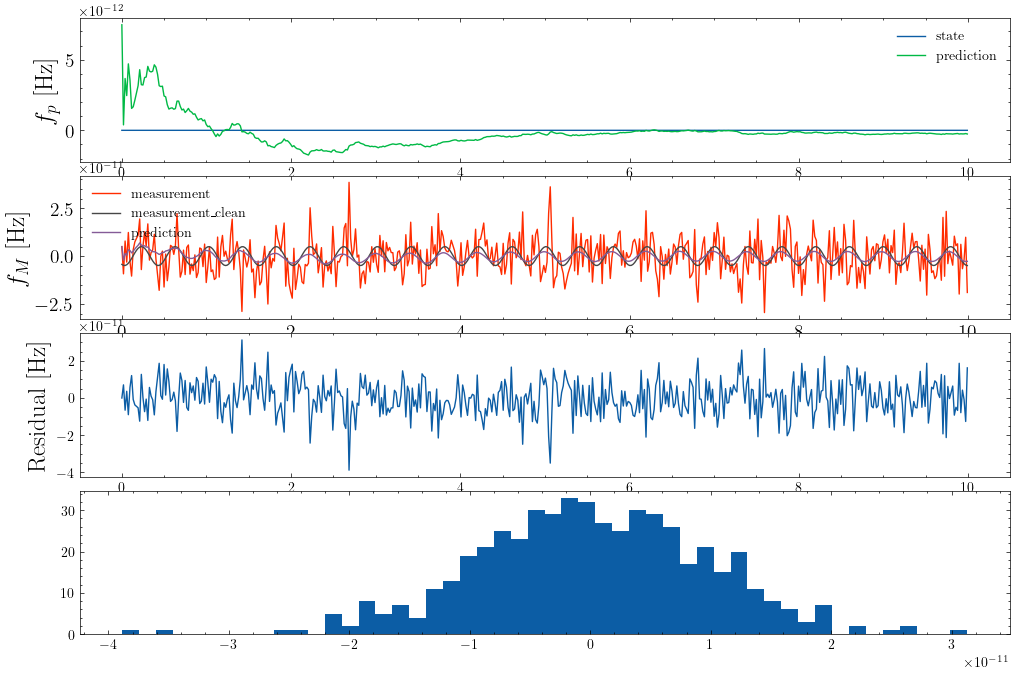

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


Model likelihood is:  585176.0642477258
Mean residual: 6.024365262786711e-14


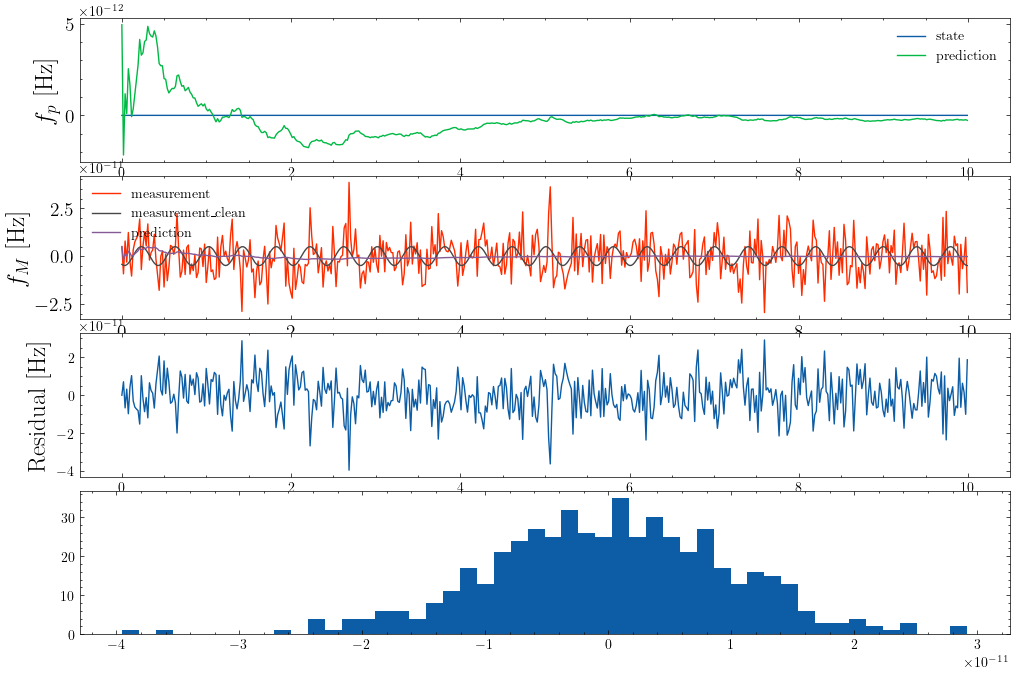

The evidence is: 585533.6735723139
Number of samples:
4565
Truths/Medians/Variances
$\omega$ 5e-07 5.003059321723287e-07 1.288852852563855e-19
$\Phi_0$ 0.2 0.19565471043358038 0.0045235589726225454
$\psi$ 2.5 2.5735291157896976 0.0008210860473833059
$\iota$ 1.0 0.6433769390334274 0.1110051617111645
$\delta$ 1.0 0.9812391714196425 0.0003996586832664478
$\alpha$ 1.0 1.0086475827650783 0.0004982878371534215
h 1.3803842646028866e-14 1.4117955601600497e-14 9.038187487967712e-30


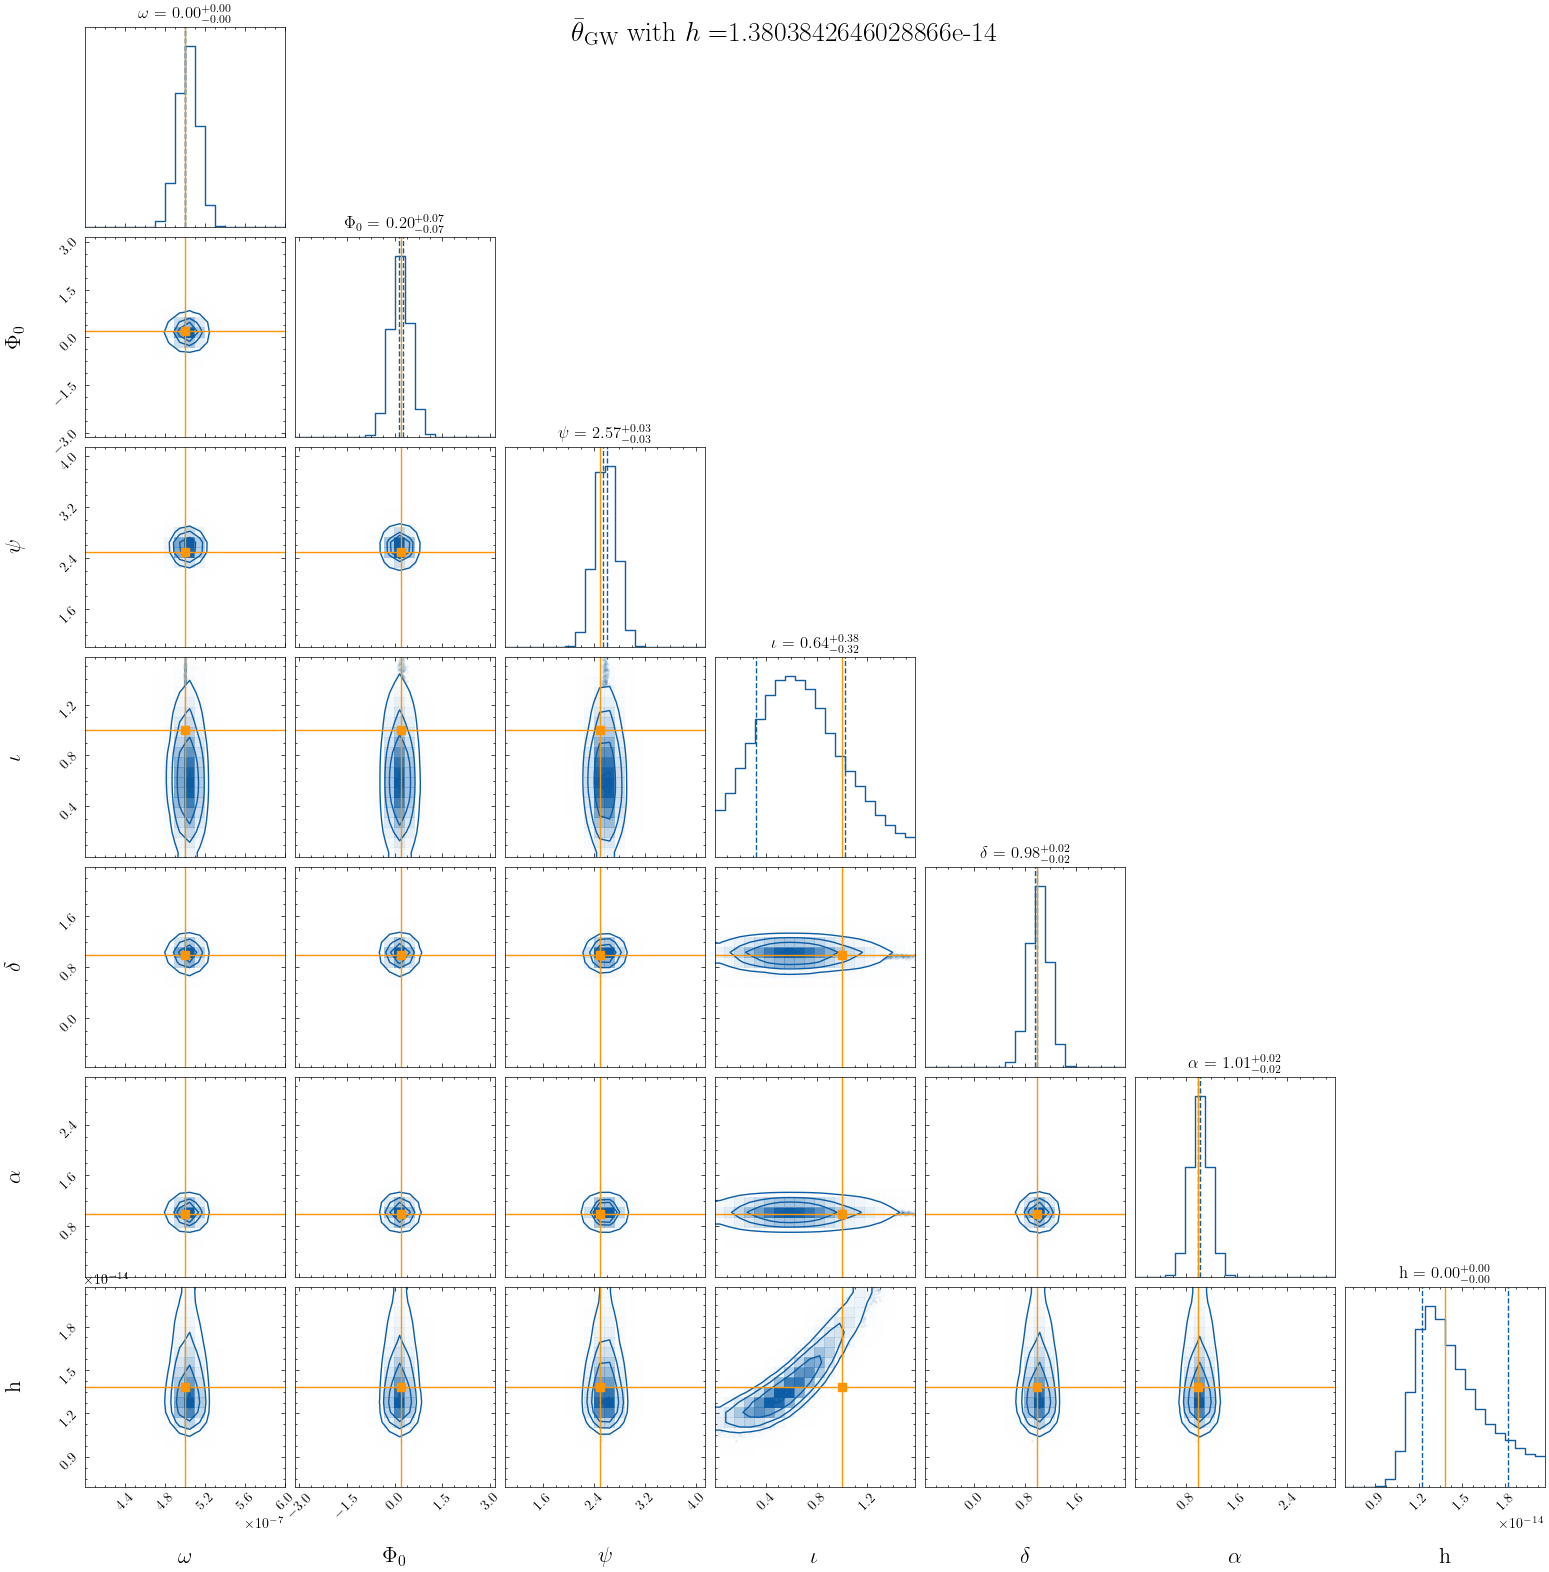

**********************************************************************


In [20]:
h = parse_filename(mid_h_earth)
seed = 1237
single_run(h,"earth",seed,perturb_omega=False)
single_run(h,"null",seed,perturb_omega=False)
plot_all_corners(mid_h_earth,save_id=None, h=h) #no point plotting a corner plot for the null model - we dont have those parameters!

## 3. Small strain 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Model likelihood is:  585736.9835002277
Mean residual: 1.6911125390839663e-13


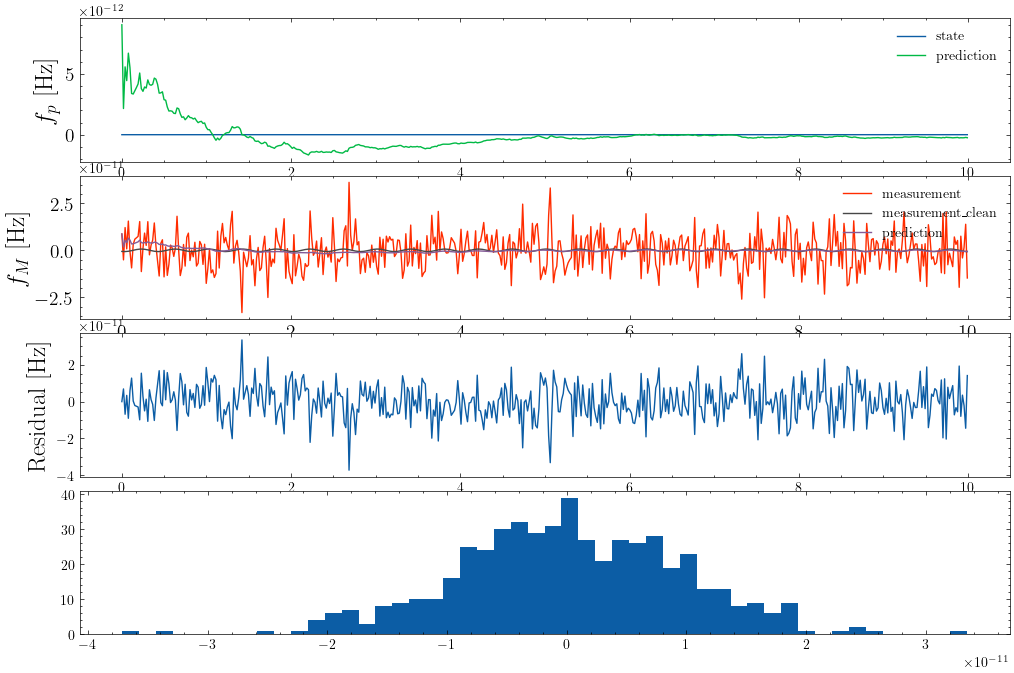

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


Model likelihood is:  585727.3901896063
Mean residual: 1.6354653153351975e-13


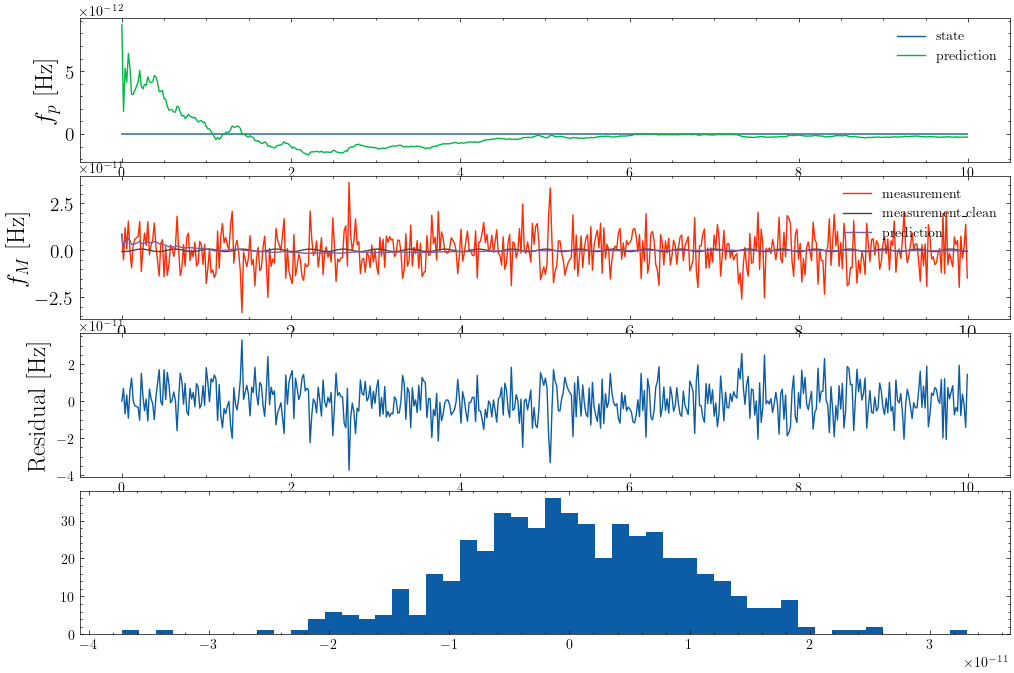

The evidence is: 585727.1664764392
Number of samples:
1890
Truths/Medians/Variances
$\omega$ 5e-07 5.105953438827265e-08 3.799192534184208e-12
$\Phi_0$ 0.2 0.8245217069826567 0.20250879545138828
$\psi$ 2.5 1.532409737548249 0.8286511744430543
$\iota$ 1.0 0.8116668986042547 0.20319160561858304
$\delta$ 1.0 0.8245250538392966 0.20687554661703983
$\alpha$ 1.0 1.6003146782316322 0.8263599459102146
h 1.8620871366628655e-15 2.6715373139785046e-16 4.523415101159688e-30


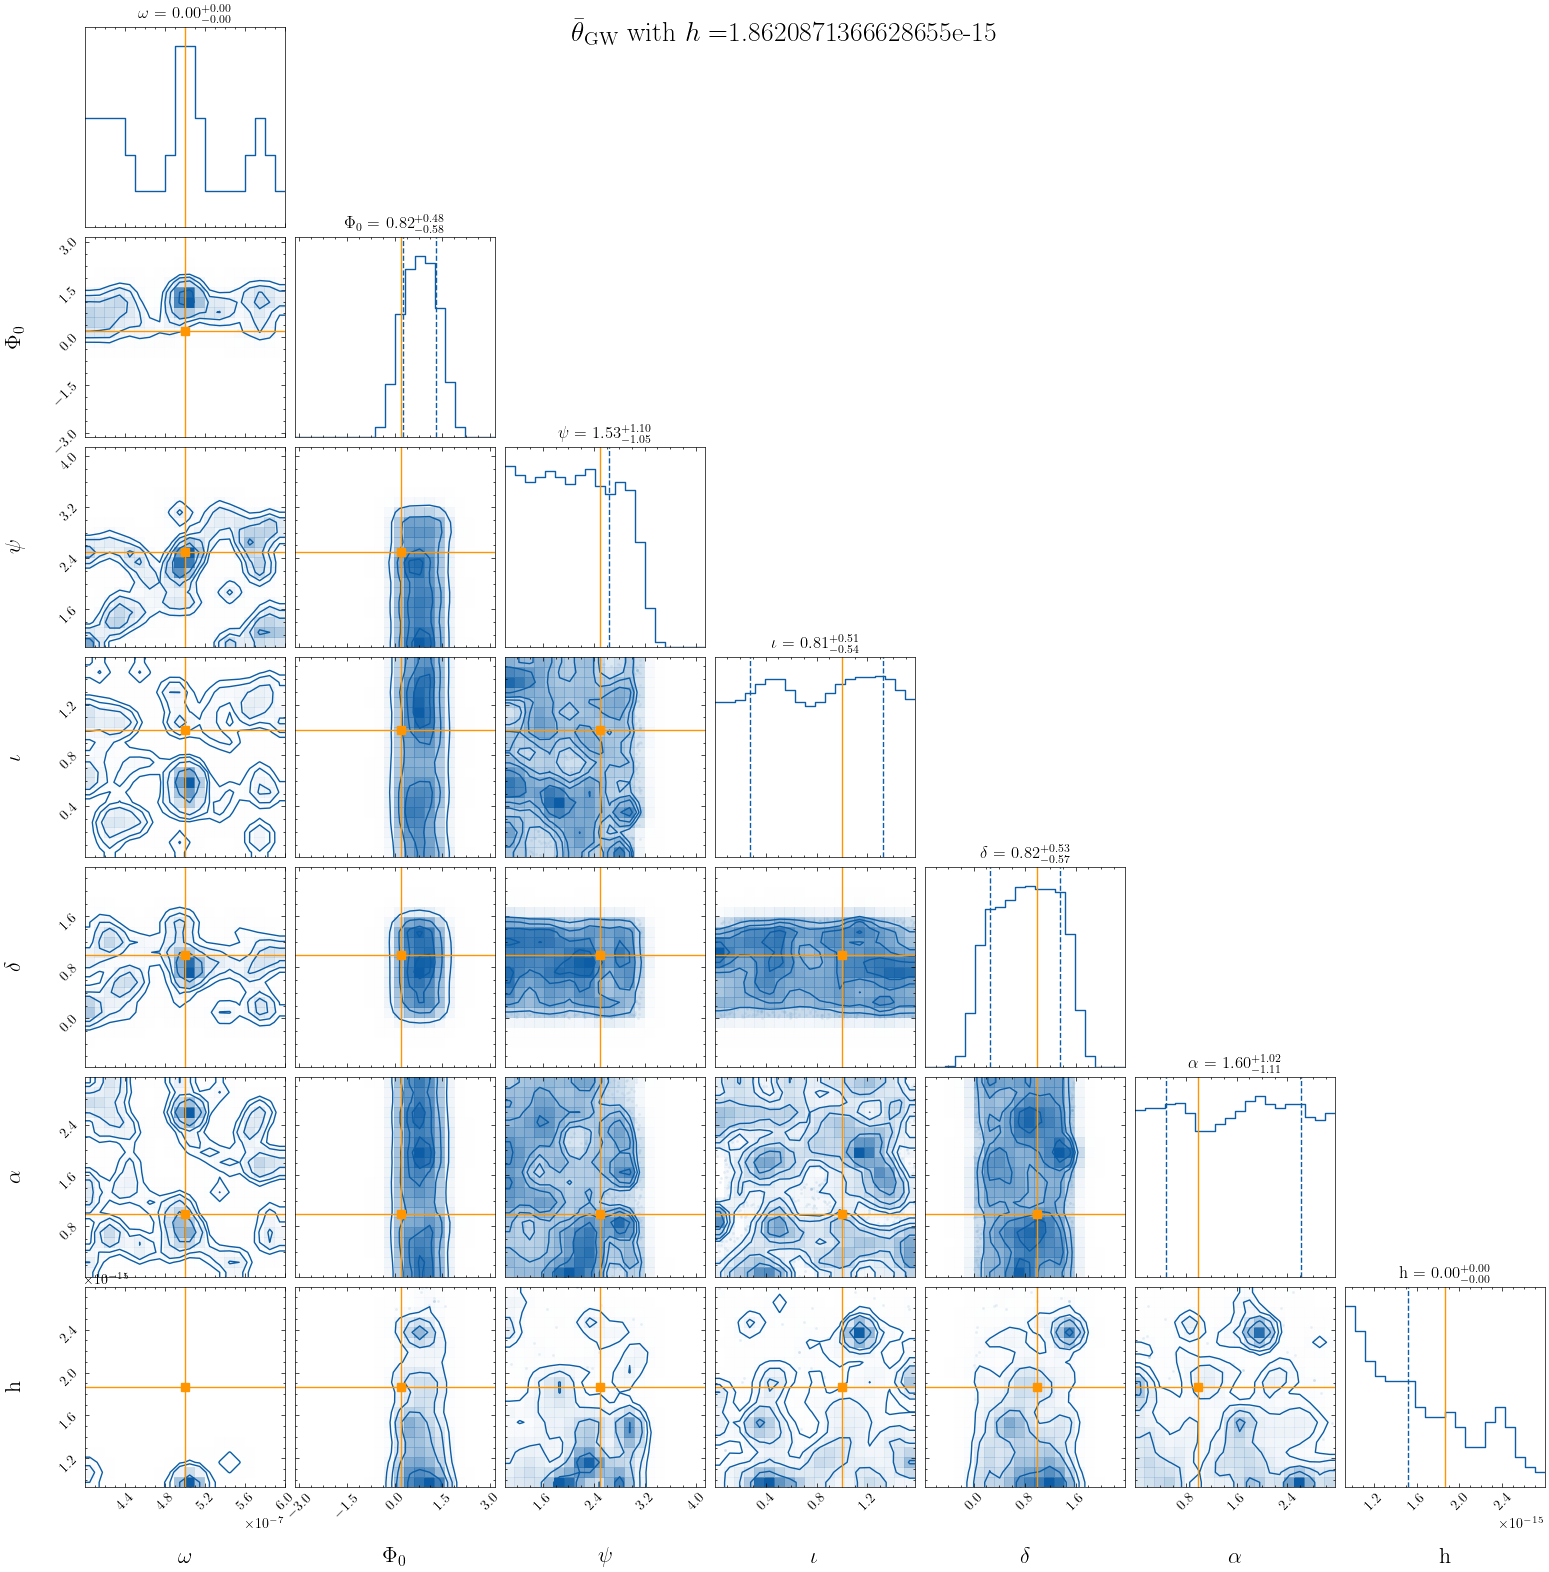

**********************************************************************


In [21]:
h = parse_filename(small_h_earth)
seed = 1237
single_run(h,"earth",seed,perturb_omega=False)
single_run(h,"null",seed,perturb_omega=False)
plot_all_corners(small_h_earth,save_id=None, h=h) #no point plotting a corner plot for the null model - we dont have those parameters!

##